# Community Innovation Survey (2021)

`Jupyter Notebook` is a great tool for data analysis and presentation. It is also a great tool for teaching.

In this notebook, we will go through Community Innovation Survey (2021) data and do some analysis together. __It is purely for teaching purpose, and should not be used for any other purpose.__

__Note:__ I use `data.table` and `%>%` intentionally to make the code more readable. If you are not familiar with these two, please check [this](https://rdatatable.gitlab.io/data.table/) and [this](https://magrittr.tidyverse.org/).

In [1]:
# library key packages
# install them if you don't have them
# install.packages(c("data.table", "magrittr", "knitr", "ggplot2"))
library(data.table)
library(magrittr)
library(knitr)
library(ggplot2)

In [2]:
# read data
file_path <- "../data/innovation_survey/extmidp21.csv"
survey <- fread(file_path)
str(survey)
# Classes ‘data.table’ and 'data.frame':	5083 obs. of  284 variables:

Classes ‘data.table’ and 'data.frame':	5083 obs. of  284 variables:
 $ id          : int  300127 301003 301078 301084 301189 301282 301396 301420 301591 301948 ...
 $ branche     : chr  "Elektroindustrie" "Metallerzeugung/-bearbeitung" "Maschinenbau" "Energie/Bergbau/Mineraloel" ...
 $ bran_4      : chr  "Forschungsintensive Industrie" "Sonstige Industrie" "Forschungsintensive Industrie" "Sonstige Industrie" ...
 $ filter      : chr  "nein" "ja" "nein" "ja" ...
 $ ost         : chr  "ost" "ost" "west" "west" ...
 $ ustaat      : chr  "" "" "" "" ...
 $ gb          : chr  "Bereich" "Bereich" "Bereich" "Bereich" ...
 $ bges        : num  38.4 4.05 497.85 311.48 751.19 ...
 $ gk3n        : chr  "50-249Besch" "<50Besch" ">=250Besch" "50-249Besch" ...
 $ bges18      : num  38.4 5.06 NA 290.13 NA ...
 $ gk3n18      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bges19      : num  38.4 4.05 NA 297.04 NA ...
 $ gk3n19      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bhsp  

## Industry 

We will first look at the industry distribution of the sample.

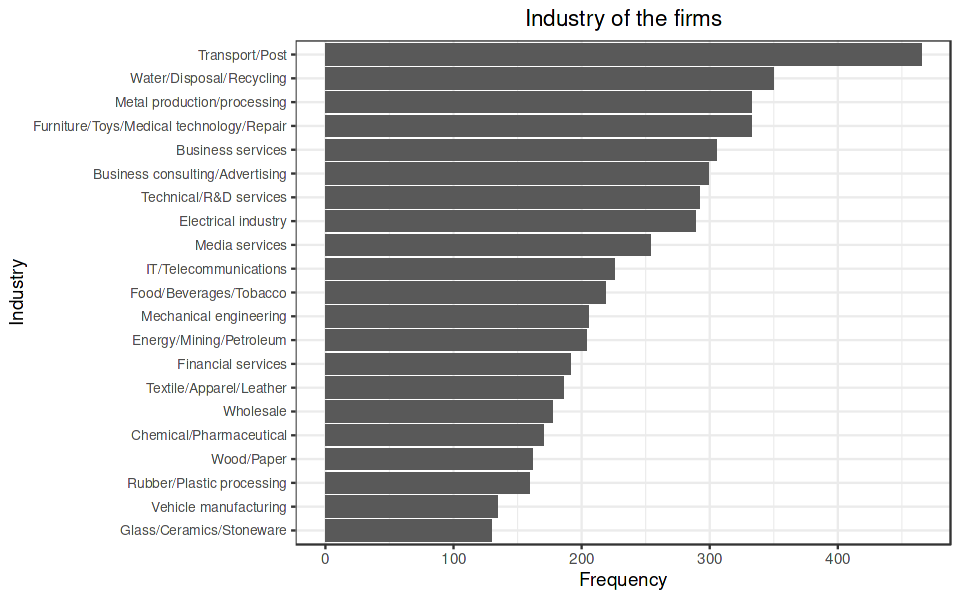

In [18]:
# industry: branche
translation = c("Transport/Post", "Water/Disposal/Recycling", "Metal production/processing",
                "Furniture/Toys/Medical technology/Repair", "Business services",
                "Business consulting/Advertising", "Technical/R&D services",
                "Electrical industry", "Media services", "IT/Telecommunications",
                "Food/Beverages/Tobacco", "Mechanical engineering", "Energy/Mining/Petroleum",
                "Financial services", "Textile/Apparel/Leather", "Wholesale", "Chemical/Pharmaceutical",
                "Wood/Paper", "Rubber/Plastic processing", "Vehicle manufacturing",
                "Glass/Ceramics/Stoneware")
# set graph size
options(repr.plot.width = 8, repr.plot.height = 5)
survey %>%
    # select the column branche
    .[, .(branche)] %>%
    # summarize the frequency of each category
    table() %>%
    as.data.table() %>%
    .[order(-N)] %>%
    # add translation of branche
    .[, industry := translation] %>%
    # plot the bar chart
    ggplot(aes(x = reorder(industry, N), y = N)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(x = "Industry", y = "Frequency", title = "Industry of the firms") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme(axis.text.y = element_text(size = 8))

In [6]:
# bran_4 - big category of industry
survey %>%
    .[, .(bran_4)] %>%
    table() %>%
    as.data.table()

bran_4,N
<chr>,<int>
Forschungsintensive Industrie,798
Sonstige Dienstleistungen,947
Sonstige Industrie,2164
Wissensintensive Dienstleistungen,1174


## Bivariate analysis

We will then look at the relationship between industry and other variables, such as

- bges: full time employees (size of the firm)
- bhsp: share of high skilled employees (with university degree)
- um: sales in million euro (2020, anymous)
- umx: sales in million euro (2020)
- exs: export intensity (share of export in total sales)

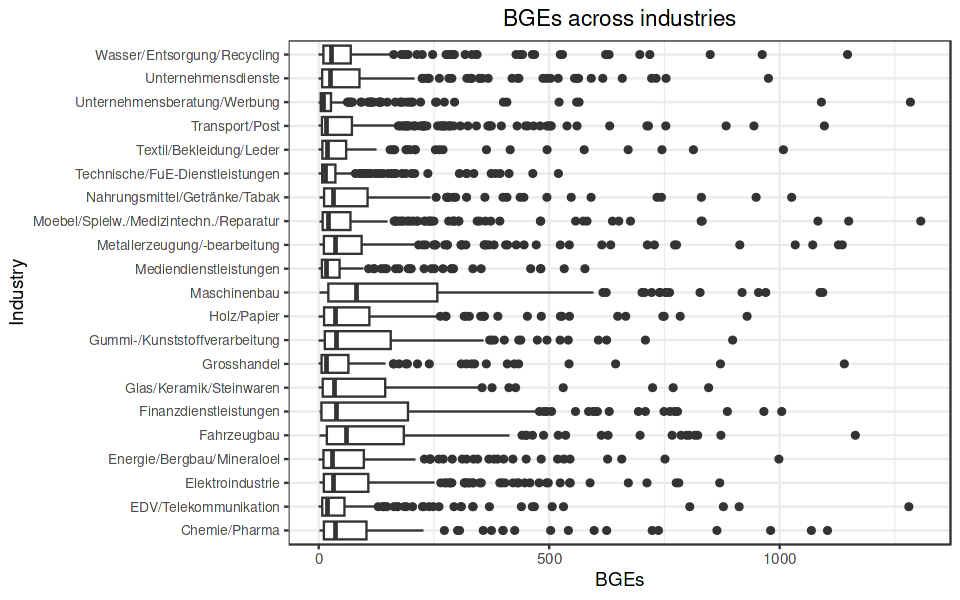

In [8]:
# industy and bges 
# one discrete variable and one continuous variable
# boxplot across groups
survey %>%
    .[, .(branche, bges)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = bges)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "BGEs", title = "BGEs across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As we can see that any industry related to "Manufacturing" employs more people than other industries.
ICT industry in Germany is not very big compared to other industries.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
”


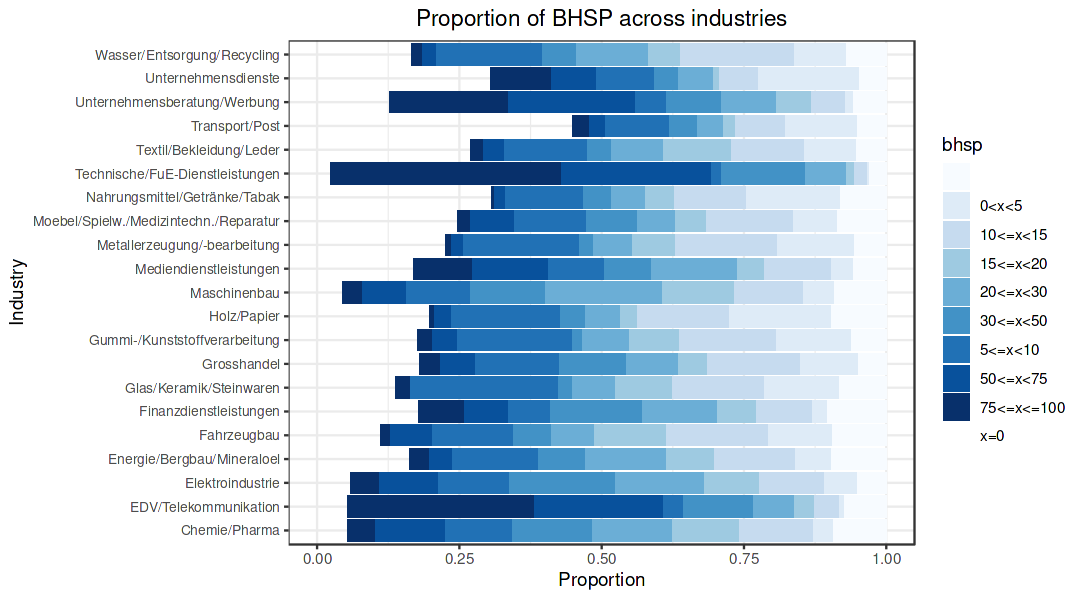

In [16]:
# industry and bhsp
options(repr.plot.width = 9, repr.plot.height = 5)
survey %>%
    .[, .(branche, bhsp)] %>% # head()
    # two categorical variables
    # visualize the contingency table
    ggplot(aes(x = branche, fill = bhsp)) +
    geom_bar(position = "fill") +
    coord_flip() +
    labs(x = "Industry", y = "Proportion", title = "Proportion of BHSP across industries") +
    scale_fill_brewer(palette = "Blues") + # add gradient fill
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As we can see some industries such as ICT (EDV/Telecom), Technische/FuE-Dienstleistungen(technical/R&D services) have higher share of high skilled employees.

In [21]:
# um: sales in 2020 (anymous)
# umx: sales in 2020
survey %>%
    # take a look at the dataset
    .[, .(um, umx)] %>%
    # sample 5 rows from the whole dataset
    .[sample(.N, 5)]

um,umx
<dbl>,<chr>
0.2749661,keine Stutzung
0.0000000,keine Stutzung
8.1164846,keine Stutzung
40.5058229,keine Stutzung
0.2158026,keine Stutzung


We learned that `umx` is not informative, so we will use `um` instead.

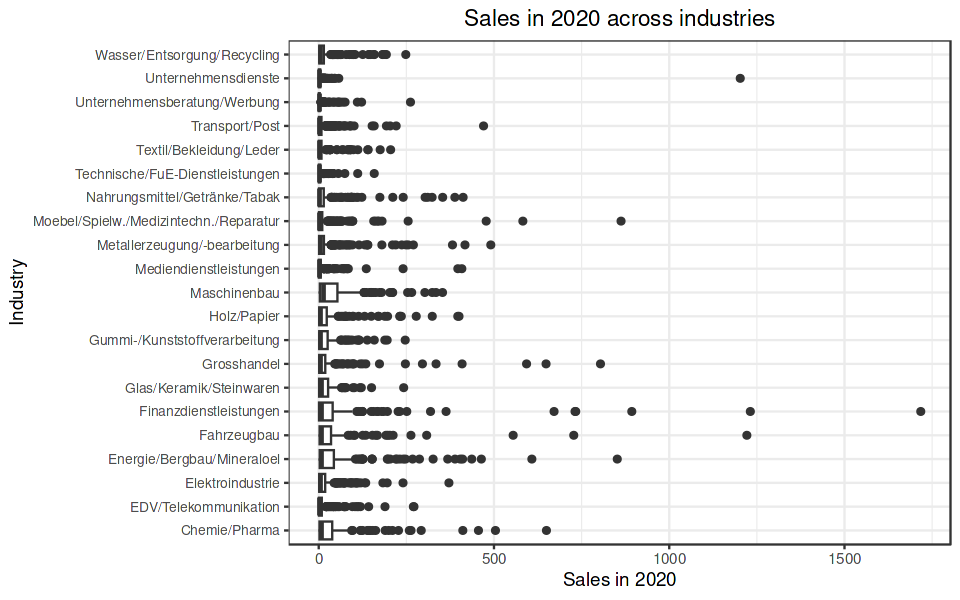

In [24]:
# check the distribution of um across industries
survey %>%
    .[, .(branche, um)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = um)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Sales in 2020", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

__Remark:__ you can see that we have lots of outliers in the data. In business world,
this is very common. Those outliers mean:

- a small share of firms doing very well (dominates the market)
- firms in low 25% percentile are not doing well (may exit the market in the future)

Now, let's understand sales better by transforming it into log scale.

In [26]:
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>% head()

branche,um,um_log
<chr>,<dbl>,<dbl>
Elektroindustrie,2.4437252,1.2365538
Metallerzeugung/-bearbeitung,0.7203522,0.5425291
Maschinenbau,99.5714631,4.6108686
Energie/Bergbau/Mineraloel,197.2720191,5.2896399
Energie/Bergbau/Mineraloel,851.7221776,6.7484338
Elektroindustrie,28.5367212,3.3856343


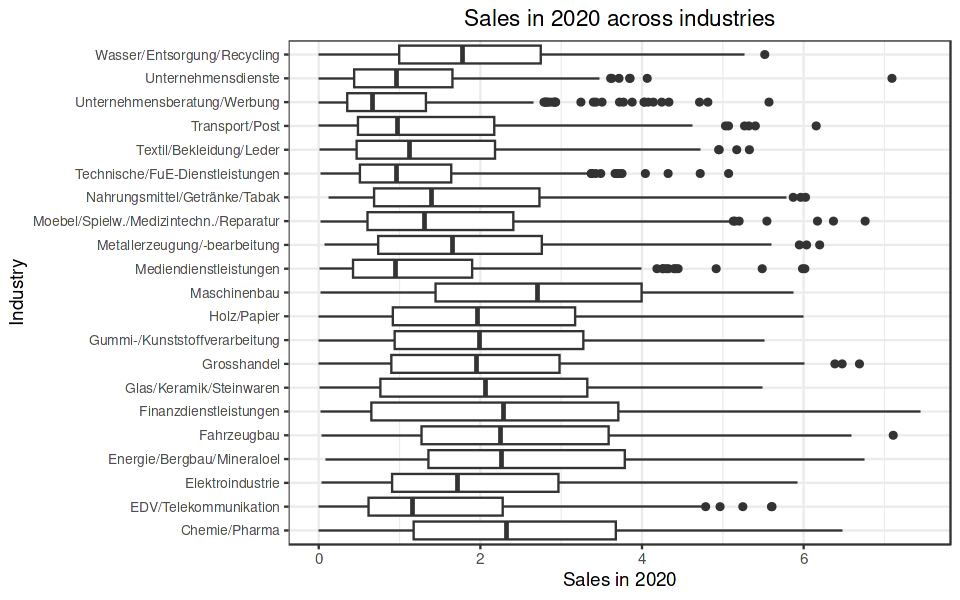

In [27]:
# now plot the boxplot of um_log
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = um_log)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Sales in 2020", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As you can see, with the log scale, the distribution of sales is more similar across industries.
If we focus on the median, we can see that the median sales in ICT industry is lower than other industries. For the chemical industry and machinery industry, the median sales are much higher than other industries.

We could also do histogram for each industry. We do this purly for exploratory purpose.
__You should know that boxplot is good enough for most of the cases.__

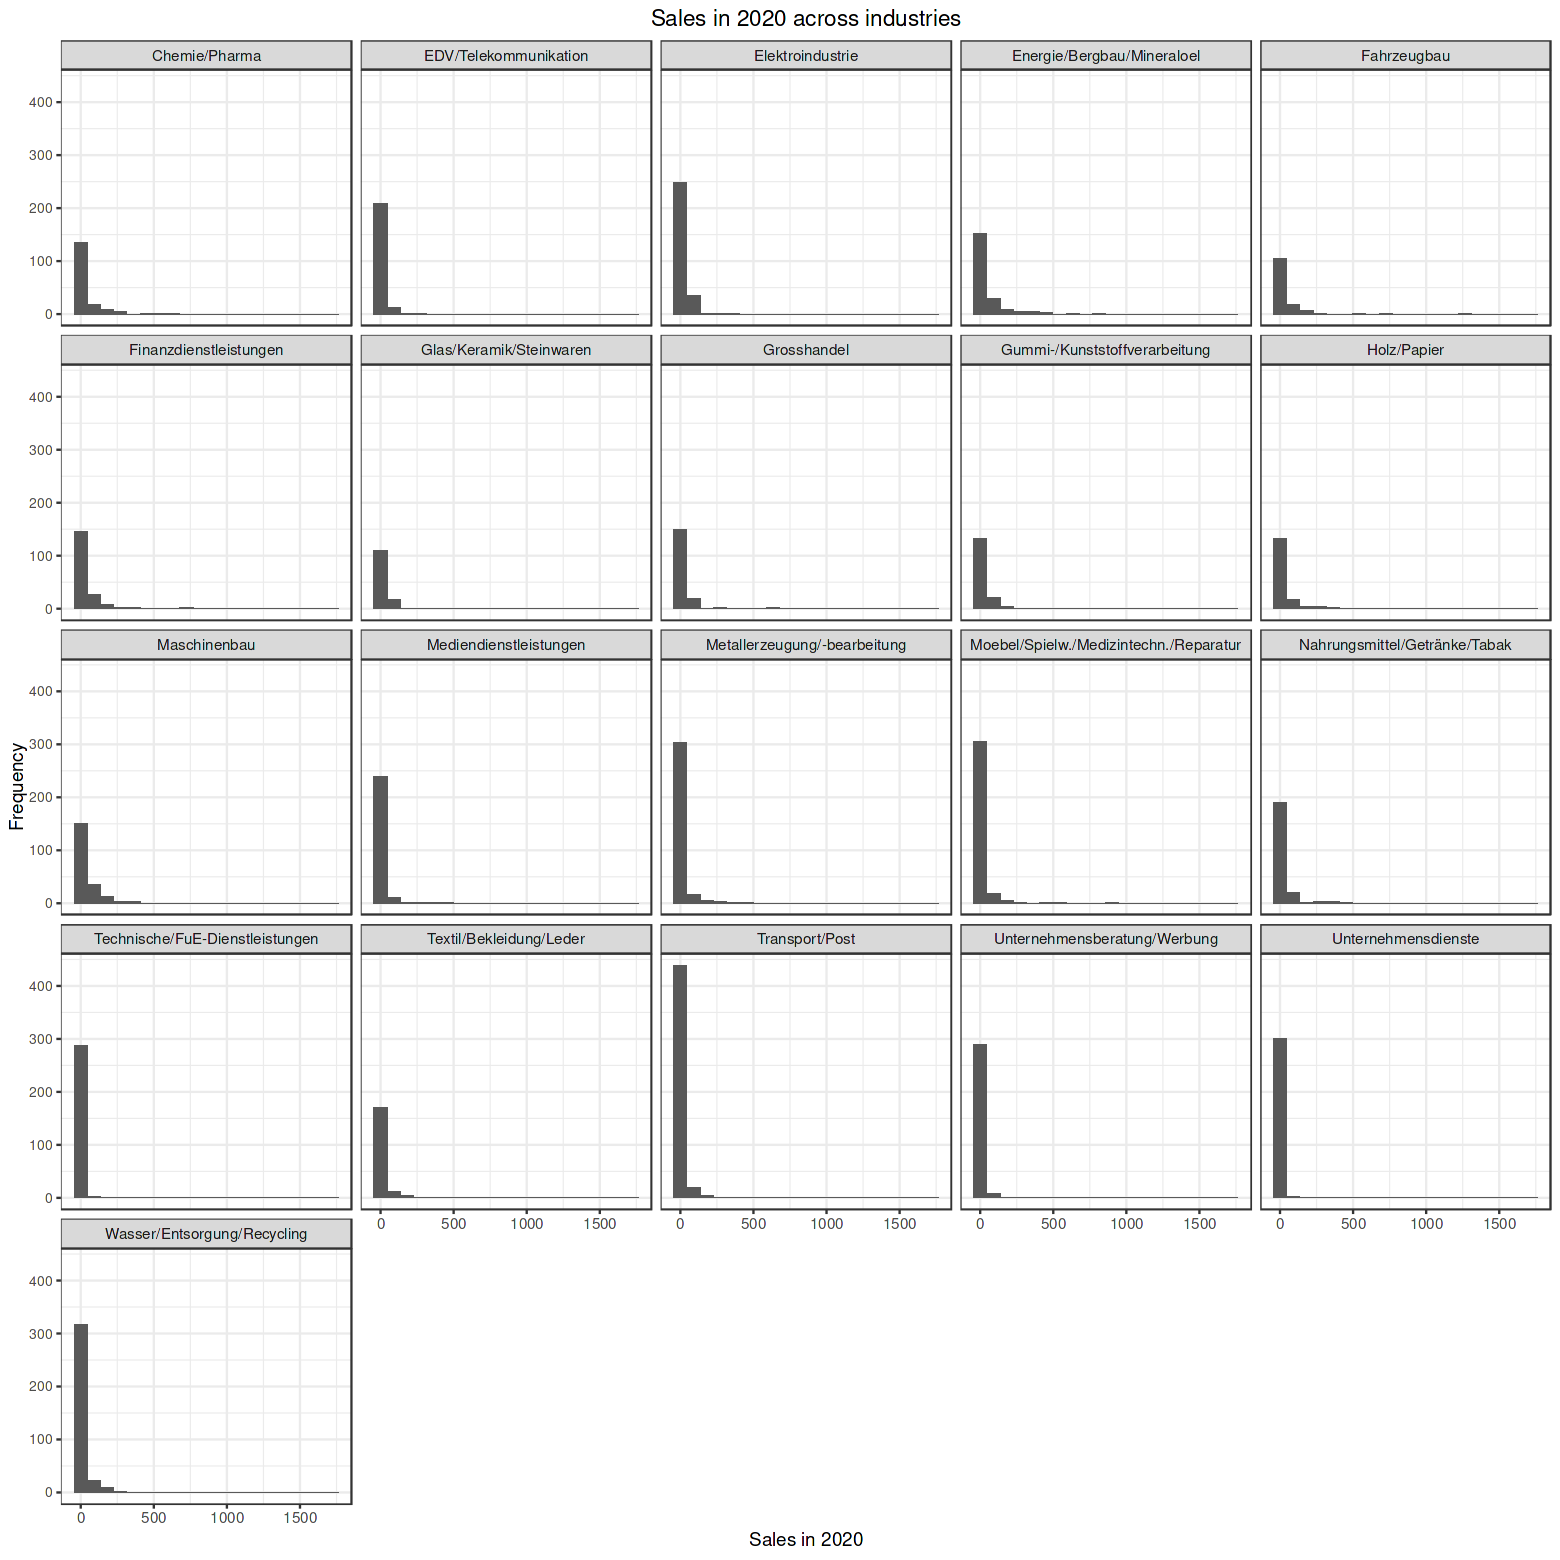

In [38]:
# histogram across groups
options(repr.plot.width = 13, repr.plot.height = 13)
survey %>%
    .[, .(branche, um)] %>%
    # ggplot for histogram with facet
    ggplot(aes(x = um)) +
    geom_histogram(bins = 20) +
    facet_wrap(~branche, ncol = 5) +
    labs(x = "Sales in 2020", y = "Frequency", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As you can see that distribution of sales if very skewed. This is very common in business world.

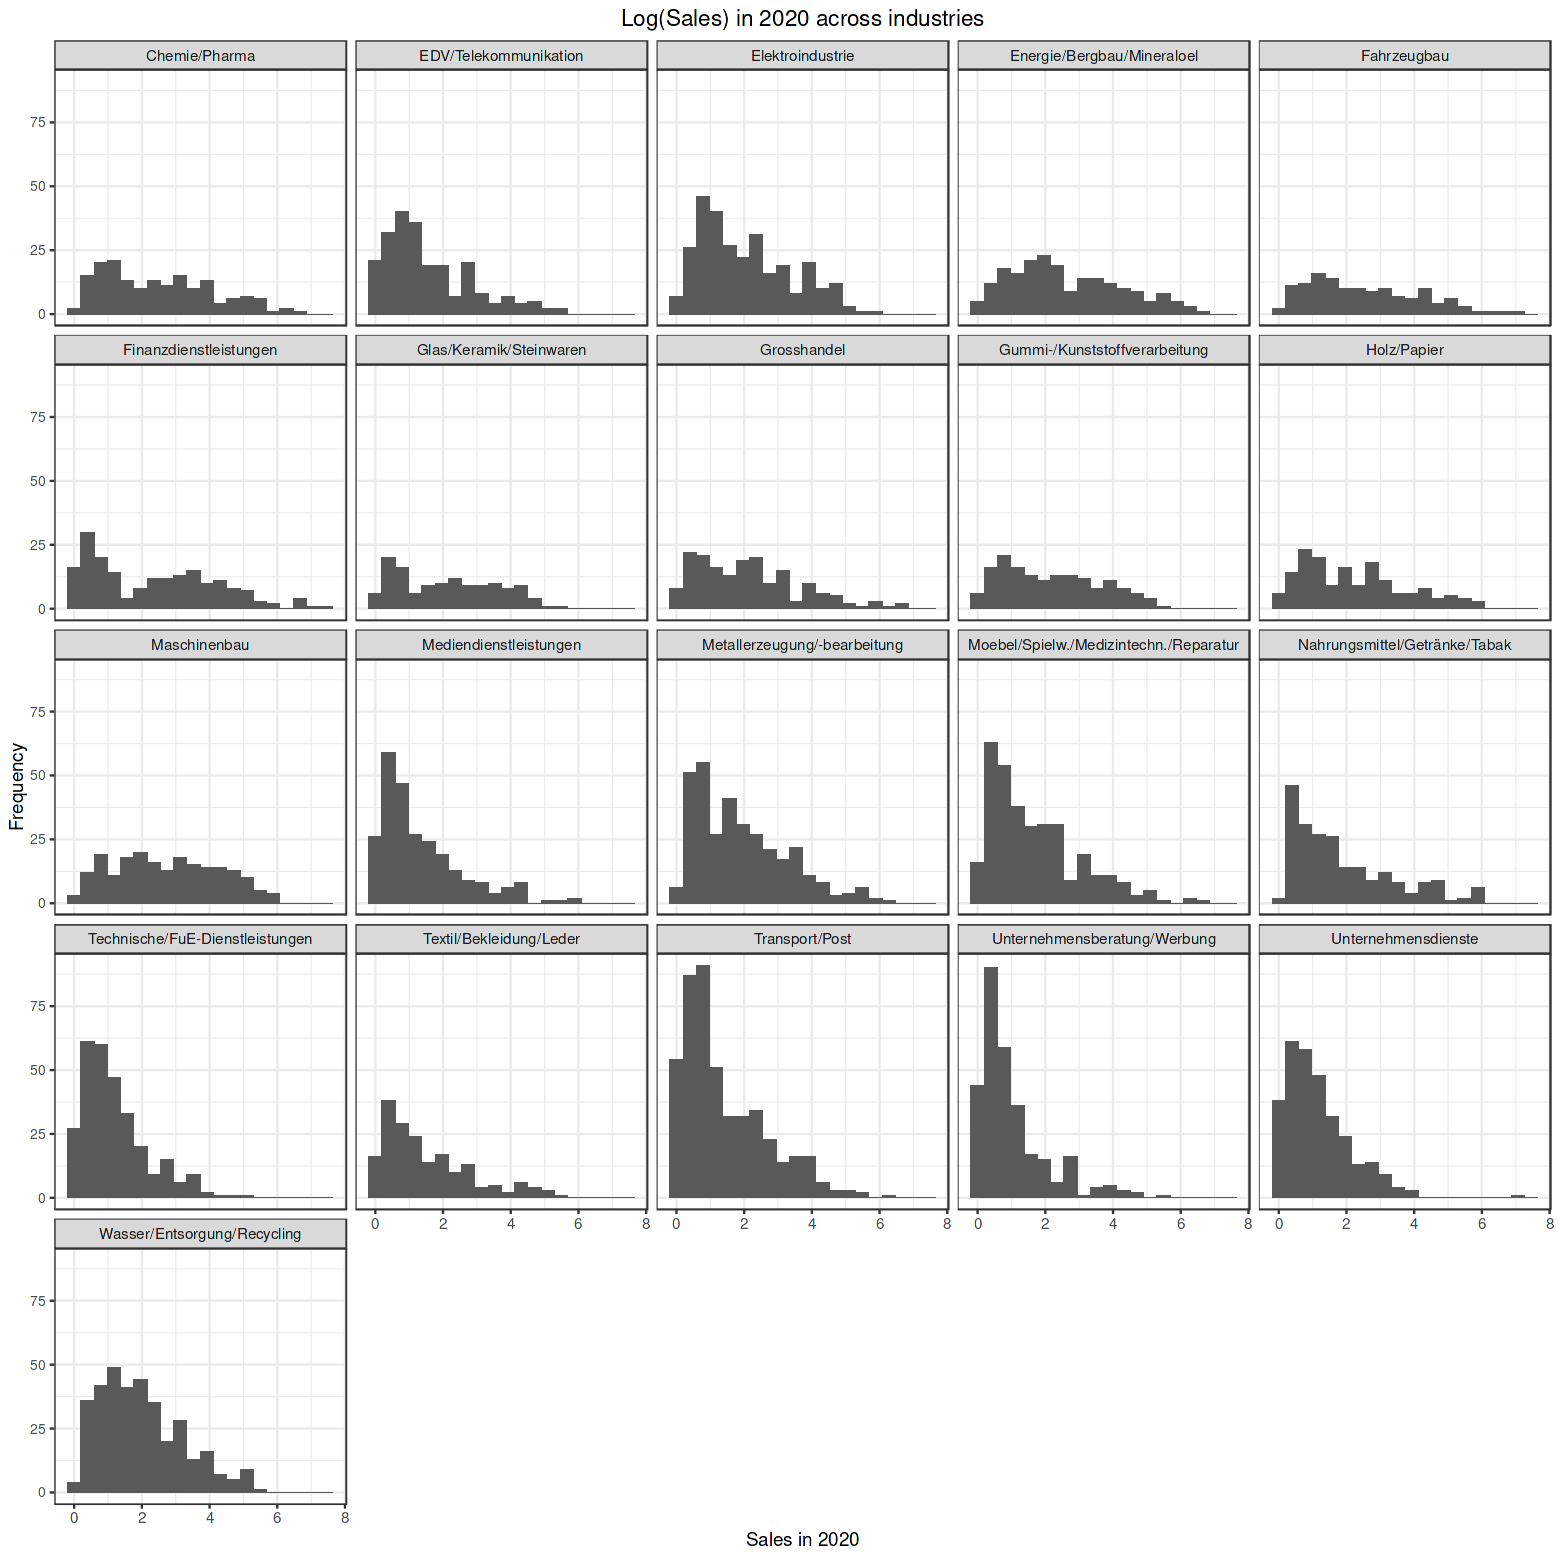

In [37]:
# now, let's do the same thing for um_log
options(repr.plot.width = 13, repr.plot.height = 13)
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>%
    # ggplot for histogram with facet
    ggplot(aes(x = um_log)) +
    geom_histogram(bins = 20) +
    facet_wrap(~branche, ncol = 5) +
    labs(x = "Sales in 2020", y = "Frequency", title = "Log(Sales) in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

The above two figures only shows that log-transformed sales is more like a normal distribution.

In [41]:
# exs: export intensity
survey %>%
    .[, .(branche, exs)] %>% head()

branche,exs
<chr>,<dbl>
Elektroindustrie,0.19714285
Metallerzeugung/-bearbeitung,0.23033708
Maschinenbau,0.91077340
Energie/Bergbau/Mineraloel,0.02379891
Energie/Bergbau/Mineraloel,NA
Elektroindustrie,NA


In [42]:
# we have some missing values, let's check share of missing values
survey %>%
    .[, .(branche, exs)] %>%
    .[, .(missing = sum(is.na(exs)) / .N)] %>% head()

missing
<dbl>
0.111745


In [43]:
# there are 11% missing values, let's remove them
survey %>%
    .[, .(branche, exs)] %>%
    # [i, j, by] grammar, i = rows, j = columns, by = group
    # filter out missing values row by row
    .[!is.na(exs)] %>% head()

branche,exs
<chr>,<dbl>
Elektroindustrie,0.19714285
Metallerzeugung/-bearbeitung,0.23033708
Maschinenbau,0.91077340
Energie/Bergbau/Mineraloel,0.02379891
Energie/Bergbau/Mineraloel,0.00000000
Gummi-/Kunststoffverarbeitung,0.35136464


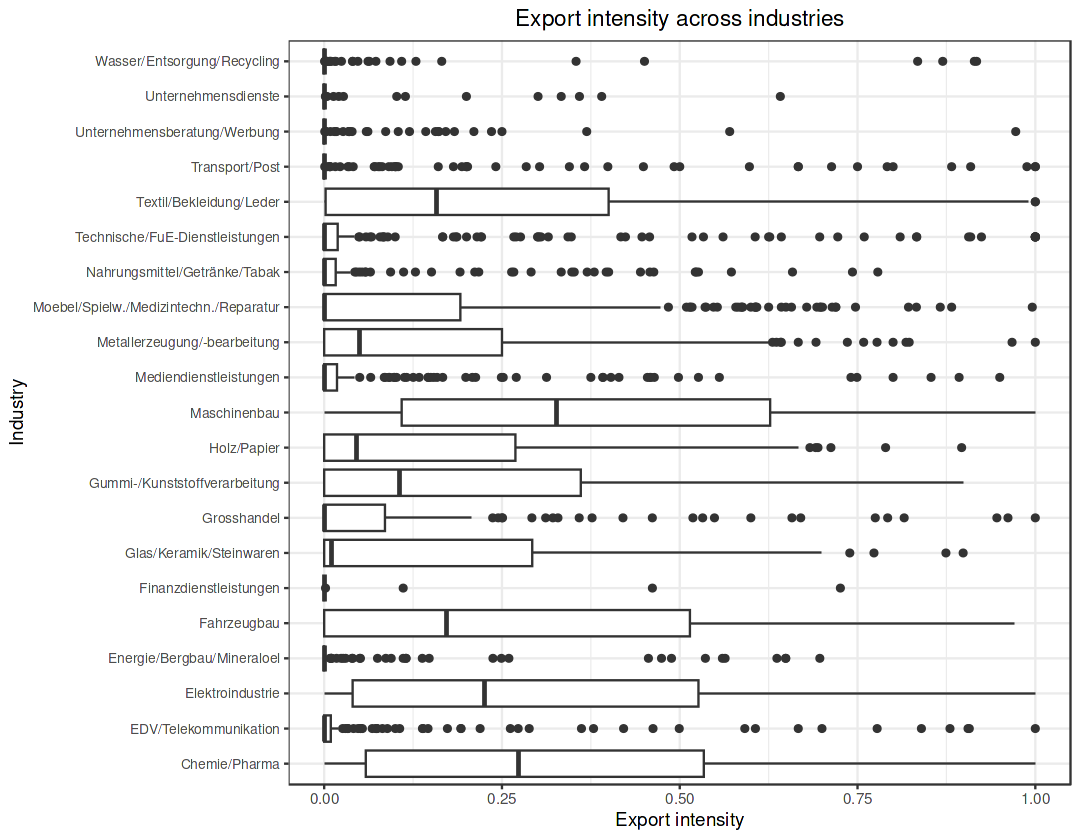

In [46]:
options(repr.plot.width = 9, repr.plot.height = 7)
survey %>%
    .[, .(branche, exs)] %>%
    .[!is.na(exs)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = exs)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Export intensity", title = "Export intensity across industries") +
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

When export intensity is high, it means that German firms are very competitive in the world market.
From the above figure, we can see that following industries are very competitive in the world market:

- Chemical industry
- Machinery industry
- Electrical industry

So, __it is all about Cars, Chemicals, and Machines.__ in German. 

In [47]:
# how about correlation between um and exs?
survey %>%
    .[, .(um, exs)] %>%
    .[!is.na(exs)] %>%
    cor()

,um,exs
um,1.000000,0.173552
exs,0.173552,1.000000


In [48]:
# we can see that correlation is not very strong
# but the above correlation does not take into account the industry
# let's check correlation within each industry
survey %>%
    .[, .(branche, um, exs)] %>%
    .[!is.na(exs)] %>%
    # calculate correlation within each industry
    .[, .(cor = cor(um, exs)), by = branche] %>%
    # sort by correlation
    .[order(-cor)]

branche,cor
<chr>,<dbl>
Holz/Papier,0.4897273642
Maschinenbau,0.4275007485
Gummi-/Kunststoffverarbeitung,0.4175054244
Metallerzeugung/-bearbeitung,0.3409828074
Nahrungsmittel/Getränke/Tabak,0.2953863857
Textil/Bekleidung/Leder,0.2664852142
Unternehmensberatung/Werbung,0.2414337130
Grosshandel,0.2410844923
Elektroindustrie,0.2186389755
